# Árvore de Decisão


Nesta aula nós veremos o uso do método de AM baseado em Árvore de Decisão existente no scikit-learn.

**Índice:**

  - [Configuração do notebook e dos dados](#Configuração-do-notebook-e-dos-dados)
    - [Atividade 1](#Atividade-1)
    - [Atividade 2](#Atividade-2)
  - [Treinamento do modelo](#Treinamento-do-modelo)
    - [Atividade 3](#Atividade-3)
  - [Teste do modelo](#Teste-do-modelo)
    - [Atividade 4](#Atividade-4)
    - [Atividade 5](#Atividade-5)


## Configuração do notebook e dos dados

Vamos utilizar algumas bibliotecas para isso:

- `numpy` e `pandas`: para trabalhar com os dados tabulares
- `sklearn`: modelos, classes para manipular dados e analisar resultados
- `pyplot`: biblioteca para gerar gráficos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

Usaremos dois arquivos que você pode baixar no ColabWeb:

- `iris-treino.csv`: contém a amostra de treinamento. São os exemplos que, em uma aplicação real, nós teríamos coletado para encontrar os parâmetros do modelo
- `iris-teste.csv`: contém um conjunto de dados que simula os exemplos futuros, isto é, aqueles que serão usados com o nosso modelo em produção

Ambos os arquivos contêm dados que foram sub-amostrados da base `Iris`. Você pode obter a base `Iris` completa se executar os seguintes comandos:

```Python
from sklearn.datasets import load_iris
iris_dataset = load_iris()
```

Mas por ora vamos tratar dos dois subconjuntos selecionados para a aula.

### Atividade 1

Carregue os arquivos de treino e de teste usando `pd.read_csv`.

In [21]:
iris_treino = pd.read_csv("iris-treino.csv")
iris_teste = pd.read_csv("iris-teste.csv")

Verifique as dimensões dos dois conjuntos.

O conjunto de treino deve ter 64 linhas e 5 colunas, enquanto o conjunto de teste deve ter 86 linhas e 5 colunas.

In [13]:
print("O conjuto de treino", "está ok" if iris_treino.shape == (64,5) else "contém erros")
print("O conjuto de teste", "está ok" if iris_teste.shape == (86,5) else "contém erros")

O conjuto de treino está ok
O conjuto de teste está ok


Verifique o índice das colunas de um dos dois conjuntos.

In [15]:
iris_treino.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

Essas colunas são os **atributos** da base. Eles descrevem espécimes de três sub-espécies da flor Iris: *Iris versicolor*, *Iris setosa* e *Iris virginica*.

As flores são ilustras na figura a seguir.

![texto alternativo](https://drive.google.com/uc?export=view&id=1y60Qw8n06cfSgDXL_sqHFaTYQl-tTpmE)

Os atributos são os seguintes:

- `sepal_length` e `sepal_width`: comprimento e largura da sépala, respectivamente
- `petal_length` e `petal_width`: comprimento e largura da pétala, respectivamente

Note que as classes são strings.

### Atividade 2

Use o método `pd.Series.unique()`, aplicado na coluna `species`, para obter os valores das três classes.

In [29]:
classes = pd.Series.unique(iris_teste["species"])
classes

array(['virginica', 'versicolor', 'setosa'], dtype=object)

Uma característica do scikit-learn é que as suas classes exigem valores numéricos. É necessário converter as strings utilizando um esquema de codificação. Por exemplo

Nome da classe | Código numérico
:-- | :--
`setosa` | 0
`versicolor` | 1
`virginica` | 2

Essa codificação pode ser feita com a classe `LabelEncoder`, do módulo `sklearn.preprocessing`.

Vamos fazer isso ao mesmo tempo que separamos os conjuntos entre características (atributos de entrada) e rótulos.

1) Vamos obter as características de treino e de teste

In [51]:
X_train = iris_treino.iloc[:, :-1].values
X_test = iris_teste.iloc[:, :-1].values

2. Vamos "treinar" um codificador de rótulos nas classes do conjunto de treinamento

In [38]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder().fit(iris_treino['species'])

3. Vamos obter as classes de treino e de teste já codificadas.

In [45]:
y_train = le.transform(iris_treino['species'])
y_test = le.transform(iris_teste['species'])

## Treinamento do modelo

Agora que a base de dados está carregada e as duas partições de dados estão criadas, nós utilizaremos o método de árvore de decisão para classificação.

In [47]:
from sklearn.tree import DecisionTreeClassifier

Para treinar e aplicar modelos, o scikit-learn adota um protocolo de duas partes:

- `fit`: realiza o *ajuste* do modelo aos dados, encontrando os parâmetros da melhor hipótese à amostra de treinamento
- `predict`: aplica o modelo a um conjunto de dados, realizando a previsão da classe

Para o ajuste, o modelo precisa de acesso às características e às classes. Para previsões, o modelo precisa apenas das características dos exemplos a serem previstos, e retorna os valores previstos.

### Atividade 3

Instancie um objeto da classe `DecisionTreeClassifier`. Caso nenhum argumento seja passado para o construtor, será utilizado o critério de impureza de Gini para encontrar os atributos. Para usar ganho de informação e entropia, especifique `criterion='entropy'`.

Em seguida, usando o método `fit`, faça o treinamento do modelo para a amostra de treino.

In [49]:
clf = DecisionTreeClassifier(criterion='entropy')

In [54]:
clf.fit(X_train, y_train);

Vamos visualizar essa árvore? Use o método `DecisionTreeClassifier.plot_tree()` para desenhar uma figura que representa as decisões que foram aprendidas pelo modelo de árvore. O método `plt.figure()` é usado primeiramente para especificarmos as dimensões da figura que será plotada.

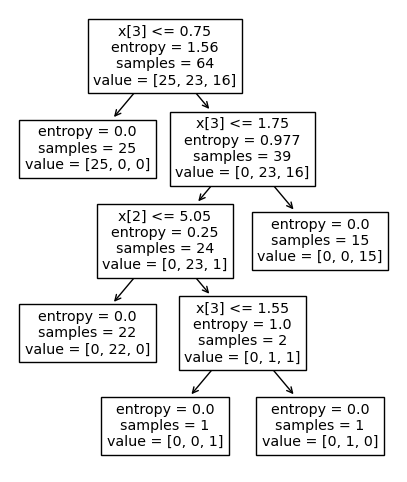

In [55]:
plt.figure(figsize=(5, 6));
sklearn.tree.plot_tree(clf);

## Teste do modelo

Agora vamos verificar como esse modelo se comporta quando é aplicado aos exemplos do conjunto de teste. Isso nos permite simular o desempenho do modelo "no mundo real".

### Atividade 4

Faça previsão com o modelo nos dados de teste.

In [ ]:
ypred = ...

Verifique quais foram as classes preditas.

In [ ]:
ypred

Os resultados são todos numéricos... mas podemos usar o `LabelEncoder` para verificar quais flores são essas.

In [ ]:
le.inverse_transform(ypred)

Mais convenientemente, podemos fazer um `DataFrame` comparando quais casos foram corretamente classificados e quais foram incorretamente classificados.

In [ ]:
tabela = pd.DataFrame(columns=['Classe verdadeira', 'Classe predita'])
tabela.iloc[:,0] = iris_teste['species']
tabela.iloc[:,1] = le.inverse_transform(ypred)
tabela

Parece que alguns casos estão incorretos...

In [ ]:
tabela[tabela.iloc[:,0] != tabela.iloc[:,1]]

Podemos computar isso numericamente com uma **métrica** chamada **acurácia**. As métricas são funções numéricas utilizadas para medir a qualidade dos modelos de acordo com diferentes critérios. A acurácia, especificamente, mede quantos exemplos foram corretamente classificados pelo modelo. É uma métrica típica de problemas de **classificação** e pode ser calculada com a seguinte equação:

$$\text{Acc}_X(y) = \frac{1}{|X|}\sum_{x \in X} \mathsf{I}\left(\hat{f}(x) = {\large\xi}(x)\right)$$

Sendo que

- $X$ é a amostra na qual estamos calculando a acurácia
- $I(\cdot)$ é a função indicadora; ela vale $1$ se a expressão for verdadeira e $0$ caso contrário
- $\hat{f}(x)$ é a saída do modelo para o exemplo $x$
- ${\large\xi}(x)$ é o rótulo verdadeiro (saída da função-conceito)$

O resultado será um valor no intervalo $[0,1]$. Quanto maior a acurácia, melhor o desempenho do modelo. Acurácia zero significa que o modelo errou todos os exemplos; acurácia um significa que todos foram corretamente classificados.

O cálculo da acurácia é simples, mas o scikit-learn pode fazer isso por nós também.

### Atividade 5

Importe a função `sklearn.metrics.accuracy_score` e use essa função para calcular a acurácia obtida pela nossa árvore de decisão no conjunto de testes.